# 🌐🌏 Spatial Analysis of Airbnb and Housing Market  Dynamics in the UK 🏠💹

## Introduction
The focus here is a GIS task - to demonstrate the spatial relationship between the Airbnb data with other factors such as housing prices, and the short to let market. Using the datasets that I have shared here and using your own research, can you answer a series of research questions using spatial data science principles. 

For the study on the spatial relationship between Airbnb data, housing prices, and the short-let market in the UK, here's how you can structure the **Overview of the Study** and **Objectives** sections, incorporating the spatial data science methods mentioned.

This codebook outlines the variables, data sources, and spatial data science methods that will be used in the analysis of Airbnb listings and their impact on housing prices and the short-let market in the UK. I require this in python. 

### Overview of the Study
This study explores the intricate spatial dynamics between Airbnb listings, housing prices, and the short-let market in the UK. With the rapid growth of Airbnb, its influence on local housing markets has become a critical issue. This study employs advanced spatial data science techniques to analyze the distribution and impact of Airbnb listings across various regions in the UK. By integrating data on housing prices, short-let markets, and Airbnb activity, the research aims to uncover patterns and relationships that inform policy-making, urban planning, and real estate investment strategies.

### Objectives
1. **Map the Spatial Distribution of Airbnb Listings:**
2. **Identify Clusters and Spatial Patterns:**
3. **Analyze the Impact of Proximity to Amenities:**
4. **Examine the Relationship Between Airbnb Listings and Housing Prices:**
5. **Visualize Socioeconomic Factors and Airbnb Density:**
6. **Assess the Impact of Airbnb on Local Housing Markets:**
7. **Evaluate Connectivity and Accessibility:**


These objectives will guide the study in systematically uncovering the spatial relationships between Airbnb activity, housing prices, and the short-let market, providing insights into the broader impact of short-term rentals on local housing dynamics in the UK.

## Variables

### Airbnb Data
- **listing_id**: Unique identifier for Airbnb listing.
- **latitude**: Latitude coordinate of listing/property/area.
- **longitude**: Longitude coordinate of listing/property/area.
- **price_per_night**: Price per night for Airbnb listing.
- **availability_365**: Number of days listing is available in a year.
- **number_of_reviews**: Total number of reviews for Airbnb listing.
- **neighbourhood**: Name of the neighborhood of Airbnb listing.

### Property Data
- **postcode**: Postal code of property/area (Source: Housing Prices, Short-let, ONS Data).
- **price**: Sale price of property (Source: UK House Price Index - UKHPI).
- **date_of_sale**: Date when the property was sold (Source: UK House Price Index - UKHPI).
- **property_type**: Type of property (detached, semi-detached, etc.) (Source: UK House Price Index - UKHPI).
- **rental_price**: Monthly rental price of short-let property (Source: Short-let Market Data).
- **availability_status**: Current availability status of short-let property (Source: Short-let Market Data).

### Socioeconomic Data
- **median_income**: Median household income for area (Source: ONS Data).
- **population_density**: Population density of area (Source: ONS Data).
- **unemployment_rate**: Unemployment rate for area (Source: ONS Data).

### Geographical Data
- **boundary_polygon**: Polygon representing geographical boundaries (Source: Ordnance Survey Data).

## Data Sources

- **Airbnb Data**: Data related to Airbnb listings, including pricing and reviews.
- **UK House Price Index (UKHPI)**: Provides information on property sales prices and property types.
- **Short-let Market Data**: Contains data on short-let rental prices and availability.
- **ONS Data**: Includes socioeconomic indicators such as median income, population density, and unemployment rate.
- **Ordnance Survey Data**: Provides geographical boundaries for the areas in question.


## Install all the required libraries

In [37]:
# data analysis
import pandas as pd
import scipy
import statsmodels
import polars as pl


# spatial anlaysis
import geopandas as gpd
import osmnx
import geopy
import pysal

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium


# set warning
import warnings

warnings.filterwarnings('ignore')

In [38]:
# set dataframe max display width
pd.set_option('display.max_columns',100)
pd.set_option('display.expand_frame_repr', False)

## Data Import and Pre-processing: 

Importing datasets (Airbnb, housing prices, short-let market data, etc.). Cleaning and pre-processing data, including geocoding.

In [39]:
# read all data 
airbnb_path = "data/Airbnb listings.csv"

# property sales data
property_price_path = "data/UK Property Price data 1995-2023-04/202304.csv"

# demographic data
demo_data =""

# scrapped shortlet market data
rightmove_data = "data_output/rightmove_2024-08-24.csv"
omt_data = "data_ouput/omt_2024-08-24.csv"

# lsaoa boundary data

boundary_path = "data/Lower_Layer_Super_Output_Area_(2021)_to_LAD_(April_2023)_Lookup_in_England_and_Wales.zip"



### Data Transformation


#### Airbnb

* The price column was converted from a string to a numeric type by removing any dollar signs and ensuring it was represented as a float.
* Missing values across all columns were filled with zeroes to avoid any NaN issues.
* Columns like bathrooms, bedrooms, and beds, originally stored as floats, were converted to integers for consistency, as fractional values were not meaningful in these contexts.
* The amenities column, which contained lists of amenities as strings, was converted into binary columns for each unique amenity, where 1 indicated the presence of that amenity and 0 indicated its absence.

In [ ]:
airbnb_listing = pd.read_csv(airbnb_path)
airbnb_listing.head()

In [ ]:
airbnb_listing.columns

In [ ]:
airbnb_listing.info()

THe airbnb datasets has 75 columns we are going to be selectung fwew out of the 75 columns that matches the goal of this task

In [ ]:
selected_columns = ['neighbourhood', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price','review_scores_rating',
       'review_scores_location']

airbnb_listing_df = airbnb_listing[selected_columns]
airbnb_listing_df.head().T

In [44]:
airbnb_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           47522 non-null  object 
 1   neighbourhood_cleansed  90852 non-null  object 
 2   latitude                90852 non-null  float64
 3   longitude               90852 non-null  float64
 4   property_type           90852 non-null  object 
 5   room_type               90852 non-null  object 
 6   accommodates            90852 non-null  int64  
 7   bathrooms               57894 non-null  float64
 8   bedrooms                78118 non-null  float64
 9   beds                    57837 non-null  float64
 10  amenities               90852 non-null  object 
 11  price                   57885 non-null  object 
 12  review_scores_rating    65869 non-null  float64
 13  review_scores_location  65808 non-null  float64
dtypes: float64(7), int64(1), object(6)
mem

Price is only fixed for 57885 out of  90852 entries, since price is the biggest attribute we are intrested in, we will be drropping other data wihtout pricee, because it will diffuclt for us to analyse and understand a good relation with what is on ground if we include data without price.

In [ ]:
airbnb_listing_df = airbnb_listing_df.dropna(subset='price')
len(airbnb_listing_df)

In [9]:
import ast

# Convert `price` to numeric after removing the dollar sign
airbnb_listing_df['price'] = airbnb_listing_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert appropriate columns to numeric
airbnb_listing_df['bathrooms'] = pd.to_numeric(airbnb_listing_df['bathrooms'], errors='coerce')
airbnb_listing_df['bedrooms'] = pd.to_numeric(airbnb_listing_df['bedrooms'], errors='coerce')
airbnb_listing_df['beds'] = pd.to_numeric(airbnb_listing_df['beds'], errors='coerce')
airbnb_listing_df['review_scores_rating'] = pd.to_numeric(airbnb_listing_df['review_scores_rating'], errors='coerce')
airbnb_listing_df['review_scores_location'] = pd.to_numeric(airbnb_listing_df['review_scores_location'], errors='coerce')

# Fill all NaN values with zeroes
airbnb_listing_df.fillna(0, inplace=True)

In [10]:
airbnb_listing_df.head()

,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,review_scores_rating,review_scores_location
0,"London, England, United Kingdom",Hackney,51.52704,-0.08129,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",160.0,4.96,4.89
1,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",65.0,4.80,4.70
2,"London, United Kingdom",Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",120.0,4.80,4.93
3,"Lambeth, England, United Kingdom",Lambeth,51.46788,-0.09993,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Shampoo"", ""Dishwasher"", ""Fire extinguisher"",...",65.0,4.72,4.34
4,"Kensington, England, United Kingdom",Kensington and Chelsea,51.51735,-0.21076,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",100.0,4.74,4.87


We tried to create another dataframe for the amenities, we want to explore the amenities based on indiviaual to see which amenities  actually afffected the price the most

In [11]:
# copy the main cleaned df
airbnb_amenities = pd.DataFrame()
airbnb_amenities['amenities'] = airbnb_listing_df['amenities']

# Convert `amenities` from string to a list
airbnb_amenities['amenities'] = airbnb_amenities['amenities'].apply(lambda x: ast.literal_eval(x))

# Collect all unique amenities
all_amenities = set()
for amenities_list in airbnb_amenities['amenities']:
    all_amenities.update(amenities_list)

# Create binary columns for each unique amenity
for amenity in all_amenities:
    airbnb_amenities[amenity] = airbnb_amenities['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Drop the original 'amenities' column as it's no longer needed
airbnb_amenities.drop('amenities', axis=1, inplace=True)

In [12]:
airbnb_amenities

,"52"" TV with Apple TV, Netflix",Fast wifi – 460 Mbps,"32"" HDTV with Netflix","Housekeeping available from 11:00 AM to 2:30 PM, Saturday - available at extra cost","42"" HDTV with Apple TV, Disney+, Amazon Prime Video, Netflix",WE Portable Speaker and Alexa Bluetooth sound system,"100"" TV with Amazon Prime Video, Apple TV, Disney+, Netflix",Relaxer bath soap body soap,Fast wifi – 139 Mbps,Vary conditioner,"HDTV with Amazon Prime Video, Fire TV, Netflix, premium cable, Chromecast, Disney+",Uni refrigerator,Beko stove,Head and shoulders conditioner,Fast wifi – 155 Mbps,Quality products. body soap,"35"" TV",Loriel conditioner,Fast wifi – 484 Mbps,Neff double oven,Fast wifi – 429 Mbps,Randox (if required) shampoo,Acer refrigerator,"""Various"" body soap","24"" HDTV with Amazon Prime Video, Fire TV, Netflix",Hair dryer,Ciel conditioner,Denon 5:1 system sound system with aux,Not specific body soap,"323"" HDTV with Amazon Prime Video, Disney+, Netflix","17"" HDTV with Netflix","TV with Amazon Prime Video, Netflix, Roku",Envouque shampoo,"55"" HDTV with Disney+, Hulu, Apple TV, Chromecast, Fire TV, HBO Max, Amazon Prime Video, Netflix","32"" TV with Amazon Prime Video, Fire TV, Netflix","32"" TV with Amazon Prime Video, Fire TV, standard cable","HDTV with standard cable, premium cable, Fire TV",Standard shampoo,Ciel shampoo,Free mini toilet set provided per stay. shampoo,Natural soap bar body soap,"55"" HDTV with Netflix, Fire TV",M&S and The Beauty Pie body soap,Shared BBQ grill,"65"" HDTV with Amazon Prime Video, Netflix, standard cable","HDTV with Amazon Prime Video, Netflix, premium cable, Apple TV","50"" HDTV with Fire TV, Amazon Prime Video, standard cable",The Studio body soap,Private pool - available seasonally,Faith In Natural shampoo,...,"75"" HDTV with Amazon Prime Video, Netflix, Roku","55"" HDTV with Netflix, standard cable, Amazon Prime Video","40"" HDTV with standard cable","42"" HDTV with Apple TV, Chromecast, Disney+, Netflix, standard cable",Fisher & Pykel stainless steel double oven,"49"" TV with standard cable",Simple or similar body soap,"TV with Amazon Prime Video, Netflix, premium cable, standard cable",Baby monitor - always at the listing,"55"" HDTV with Amazon Prime Video, Disney+, standard cable, Netflix","TV with Fire TV, standard cable, Amazon Prime Video, Netflix",Samsung soundbar sound system,Cambridge Audio sound system with Bluetooth and aux,Eco friendly body soap,"HDTV with Netflix, Apple TV, Amazon Prime Video, Disney+, premium cable",AEG Electrolux refrigerator,Fast wifi – 145 Mbps,"HDTV with Amazon Prime Video, Apple TV, Fire TV, Netflix, premium cable, standard cable",Hotel brand shampoo,"48"" HDTV with Amazon Prime Video, Netflix, Disney+",Samsung sound system,Ok refrigerator,"52"" HDTV with Amazon Prime Video, Disney+, Netflix, standard cable",Neff single oven,Game console: PS5,00 shampoo,The white company conditioner,Books and reading material,"50"" HDTV with Amazon Prime Video, Apple TV, Chromecast, Disney+, HBO Max, Netflix","HDTV with Amazon Prime Video, Netflix, premium cable, Hulu, Disney+",Fast wifi – 188 Mbps,"42"" HDTV with Amazon Prime Video, Disney+, Netflix, Chromecast, premium cable",Dove Shower gel body soap,Bower collective sanitising Geranium and Grapefruit hand wash body soap,"Dove, Organic alternative body soap","HDTV with DVD player, Netflix, Amazon Prime Video","30"" HDTV with Roku",Panasonic Sound Bar sound system,"50"" HDTV with standard cable","55"" HDTV with Hulu, HBO Max, Netflix, Roku, Fire TV, Apple TV, Amazon Prime Video, Disney+","43"" HDTV with Amazon Prime Video, Netflix, standard cable","27"" HDTV with Netflix, Disney+","32"" TV with Amazon Prime Video",Guest can request before check in shampoo,"40"" HDTV with Amazon Prime Video, Disney+, Fire TV, Netflix, premium cable","65"" HDTV with Chromecast, Netflix, premium cable, standard cable","22"" HDTV with Amazon Prime Video, Netflix",CDA stainless steel gas stove,Asda body soap,Geepas stainless steel oven
0,0,0,0,

In [13]:
airbnb_amenities.columns


Index(['52" TV with Apple TV, Netflix', 'Fast wifi – 460 Mbps',
       '32" HDTV with Netflix',
       'Housekeeping available from 11:00 AM to 2:30 PM, Saturday - available at extra cost',
       '42" HDTV with Apple TV, Disney+, Amazon Prime Video, Netflix',
       'WE Portable Speaker and Alexa  Bluetooth sound system',
       '100" TV with Amazon Prime Video, Apple TV, Disney+, Netflix',
       'Relaxer bath soap body soap', 'Fast wifi – 139 Mbps',
       'Vary conditioner',
       ...
       '43" HDTV with Amazon Prime Video, Netflix, standard cable',
       '27" HDTV with Netflix, Disney+', '32" TV with Amazon Prime Video',
       'Guest can request before check in shampoo',
       '40" HDTV with Amazon Prime Video, Disney+, Fire TV, Netflix, premium cable',
       '65" HDTV with Chromecast, Netflix, premium cable, standard cable',
       '22" HDTV with Amazon Prime Video, Netflix',
       'CDA stainless steel gas stove', 'Asda body soap',
       'Geepas stainless steel oven'],
 

In [30]:
# check the total unique attributes used
len(airbnb_amenities.columns)

10204

In [40]:
# Sum the values across all rows for each amenity (i.e., sum columns)
amenities_sum = airbnb_amenities.sum(axis=0)

# Create a new DataFrame with 'Amenity' and 'Total'
amenities_summary = pd.DataFrame({
    'Amenity': amenities_sum.index,
    'Total': amenities_sum.values
})

# Display the resulting DataFrame
print(amenities_summary)

                                                 Amenity  Total
0                                      BOSH refrigerator      2
1                                     WAECO refrigerator      1
2                                 Welcome pack body soap      1
3                        Neff  stainless steel gas stove      5
4      42" HDTV with standard cable, Amazon Prime Vid...      1
...                                                  ...    ...
10199               Bang & Olufsen sound system with aux      1
10200          HDTV with Disney+, premium cable, Netflix      1
10201                     47" HDTV with Disney+, Netflix      1
10202  If it is full then there is another fridge in ...      1
10203  43" HDTV with Amazon Prime Video, Apple TV, Ch...      1

[10204 rows x 2 columns]


WE have total of 

#### Housing Prices Data

THe housye prices data was donloaded from KAgglem the dataset contains data from UK House Price Index (UKHPI) from HM Land Registry, Office for National Statistics (ONS). via kaggle platform

Link to the datasets:

In [34]:
# write schema for the data and the datetype

schema = {'Transaction_unique_identifier':pl.String,
          'price':pl.Int64, 'Date_of_Transfer':pl.Datetime,
            'postcode':pl.String, 'Property_Type':pl.String, 'Old/New':pl.String,
            'Duration':pl.Int64, 'PAON':pl.String, 'SAON':pl.String,
            'Street':pl.String, 'Locality':pl.String, 'Town/City':pl.String,
            'District':pl.String, 'County':pl.String, 'PPDCategory_Type':pl.String,
            'Record_Status - monthly_file_only':pl.String
            }

property_price_path = "data/UK Property Price data 1995-2023-04/202304.csv"

propery_price = pl.read_csv(property_price_path,ignore_errors=True,
                            truncate_ragged_lines=True,has_header=False,
                            schema_overrides=schema)
print(propery_price)

shape: (28_276_228, 16)
┌────────────┬────────┬────────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ Transactio ┆ price  ┆ Date_of_Tr ┆ postcode ┆ … ┆ District   ┆ County    ┆ PPDCatego ┆ Record_St │
│ n_unique_i ┆ ---    ┆ ansfer     ┆ ---      ┆   ┆ ---        ┆ ---       ┆ ry_Type   ┆ atus -    │
│ dentifier  ┆ i64    ┆ ---        ┆ str      ┆   ┆ str        ┆ str       ┆ ---       ┆ monthly_f │
│ ---        ┆        ┆ datetime[μ ┆          ┆   ┆            ┆           ┆ str       ┆ ile_o…    │
│ str        ┆        ┆ s]         ┆          ┆   ┆            ┆           ┆           ┆ ---       │
│            ┆        ┆            ┆          ┆   ┆            ┆           ┆           ┆ str       │
╞════════════╪════════╪════════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ {F887F88E- ┆ 70000  ┆ 1995-07-07 ┆ MK15 9HP ┆ … ┆ MILTON     ┆ MILTON    ┆ A         ┆ A         │
│ 7D15-4415- ┆        ┆ 00:00:00   ┆          ┆   ┆ KEYNES     ┆ KE

In [35]:
(propery_price[0])

Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
str,i64,datetime[μs],str,str,str,i64,str,str,str,str,str,str,str,str,str
"""{F887F88E-7D15-4415-804E-52EAC…",70000,1995-07-07 00:00:00,"""MK15 9HP""","""D""","""N""",null,"""31""","""""","""ALDRICH DRIVE""","""WILLEN""","""MILTON KEYNES""","""MILTON KEYNES""","""MILTON KEYNES""","""A""","""A"""


#### Shortlet Market data downloaded

THe shortlet market data was doenaloded from rightmove, on the market and zoopla services the last 7 days sales and rent data set was scrappedm we could only scrapped for  longs 7days beacause this paltform has a limit to aht we could get from the platofrm, a selenum python scrapper was beault to scrapped and clean this data.

Sources:
* rightmove.co.uk
* onthemarket
* zoopla.co.uk

In [54]:
# scrapped shortlet market data
rightmove_path= "data_output/rightmove_2024-08-24.csv"
omt_path= "data_output/omt_2024-08-24.csv"


rightmove_data = pd.read_csv(rightmove_path)
rightmove_data.head().T

,0,1,2,3,4
transaction,rent,rent,rent,rent,rent
address,"Kings Road, London, SW3",Muswell Road Muswell Hill N10,"Balls Pond Road, London, N1","Furley Road, Peckham","Stroud Green Road, London, N4"
bedroom,2.0,2.0,3.0,5.0,1.0
bathroom,1.0,1.0,2.0,2.0,NaN
sales_price,NaN,NaN,NaN,NaN,NaN
rent_perMonth,3683.0,2000.0,3500.0,4100.0,450.0
rent_perWeek,850.0,462.0,808.0,946.0,104.0
description,Located in this period building on the corner ...,A modern two bedroom top floor conversion apar...,A charming three-bedroom period conversion wit...,Freshly painted throughout / Fully Furnished /...,Varosi are delighted to offer this double room...
propertyType,Apartment,Flat,Flat,Terraced,House Share
location,SW3,N10,N1,Peckham,N4


In [55]:
omt_data = pd.read_csv(omt_path)
omt_data.head().T

,0,1,2,3,4
transaction,rent,rent,rent,rent,rent
address,"Vanderbilt Road, London, SW18",Joyners Close Dagenham,"Tritton Road, London SE21","Malden Road, New Malden KT3","Avon Road, Upminster RM14"
bedroom,5.0,2.0,1.0,1.0,2.0
bathroom,3.0,1.0,1.0,1.0,1.0
sales_price,NaN,NaN,NaN,NaN,NaN
rent_perMonth,4750.0,1900.0,750.0,750.0,1700.0
rent_perWeek,1096.0,438.0,173.0,173.0,392.0
description,5 bedroom terraced house to rent,2 bedroom terraced house to rent,1 bedroom in a flat share to rent,1 bedroom in a house share to rent,2 bedroom apartment to rent
propertyType,Terraced,Terraced,Flat,House,Apartment
location,SW18,Dagenham,SE21,KT3,RM14


In [69]:
## meregd the two data
meregd_data = pd.concat([omt_data,rightmove_data])
meregd_data.head()

,transaction,address,bedroom,bathroom,sales_price,rent_perMonth,rent_perWeek,description,propertyType,location,agent,listing_source,listing_url,listed_date
0,rent,"Vanderbilt Road, London, SW18",5.0,3.0,NaN,4750.0,1096.0,5 bedroom terraced house to rent,Terraced,SW18,Savills - Wandsworth,omt,https://www.onthemarket.com/details/15383726/,Added > 14 days
1,rent,Joyners Close Dagenham,2.0,1.0,NaN,1900.0,438.0,2 bedroom terraced house to rent,Terraced,Dagenham,NaN,omt,https://www.onthemarket.com/details/15695892/,Added today
2,rent,"Tritton Road, London SE21",1.0,1.0,NaN,750.0,173.0,1 bedroom in a flat share to rent,Flat,SE21,NaN,omt,https://www.onthemarket.com/details/15695809/,Added today
3,rent,"Malden Road, New Malden KT3",1.0,1.0,NaN,750.0,173.0,1 bedroom in a house share to rent,House,KT3,NaN,omt,https://www.onthemarket.com/details/15695582/,Added today
4,rent,"Avon Road, Upminster RM14",2.0,1.0,NaN,1700.0,392.0,2 bedroom apartment to rent,Apartment,RM14,NaN,omt,https://www.onthemarket.com/details/15681803/,Added today


In [71]:
# fillna wiht 0
meregd_data = meregd_data.fillna(0)

# create columns for rent and listing
meregd_data['sales'] = meregd_data['transaction'].apply(lambda x: 1 if x=='sales' else 0)
meregd_data['rent'] = meregd_data['transaction'].apply(lambda x: 1 if x=='rent' else 0)

# dropunwanted columns
listing_df = meregd_data.drop(columns=['address','description','agent','listing_source','listing_url',
                                       'transaction','listed_date'], axis=1)
listing_df.head()

,bedroom,bathroom,sales_price,rent_perMonth,rent_perWeek,propertyType,location,sales,rent
0,5.0,3.0,0.0,4750.0,1096.0,Terraced,SW18,0,1
1,2.0,1.0,0.0,1900.0,438.0,Terraced,Dagenham,0,1
2,1.0,1.0,0.0,750.0,173.0,Flat,SE21,0,1
3,1.0,1.0,0.0,750.0,173.0,House,KT3,0,1
4,2.0,1.0,0.0,1700.0,392.0,Apartment,RM14,0,1


In [74]:
# check rent data infomation
rent_listing_df = listing_df[listing_df['rent']==1]
rent_listing_df['propertyType'].unique()

array(['Terraced', 'Flat', 'House', 'Apartment', 'Studio', 0, 'Penthouse',
       'Maisonette', 'Semi-detached', 'Detached', 'Duplex', 'House Share',
       'End of Terrace', 'Flat Share', 'Semi-Detached', 'Not Specified',
       'Ground Flat', 'Chalet', 'Block of Apartments', 'Town House',
       'Mews', 'Bungalow', 'Serviced Apartments'], dtype=object)

In [75]:
# check sales data infomation
sales_listing_df = listing_df[listing_df['sales']==1]
sales_listing_df['propertyType'].unique()

array(['House', 'Semi-detached', 'Studio', 0, 'Flat', 'Apartment',
       'Terraced', 'Maisonette', 'Detached', 'Penthouse', 'Duplex',
       'Not Specified', 'Semi-Detached', 'Plot for sale', 'Town House',
       'Mews', 'Villa', 'Land for sale', 'End of Terrace',
       'Equestrian Facility', 'Block of Apartments',
       'Link Detached House', 'Character Property'], dtype=object)

                bedroom  bathroom  rent_perMonth  rent_perWeek
bedroom        1.000000  0.159602        0.44094      0.440934
bathroom       0.159602  1.000000        0.13594      0.135948
rent_perMonth  0.440940  0.135940        1.00000      1.000000
rent_perWeek   0.440934  0.135948        1.00000      1.000000


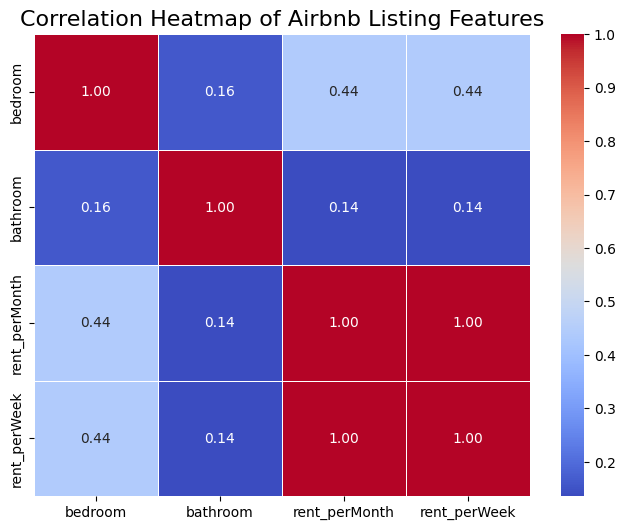

In [83]:
# Calculate the correlation matrix
corr_listing_df = rent_listing_df.drop(columns=['propertyType','location','rent','sales','sales_price'],axis=1).dropna()
correlation_matrix = corr_listing_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations, a color map, and a title
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='white')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Airbnb Listing Features', fontsize=16)

# Display the heatmap
plt.show()

In [63]:
listing_df['location'].value_counts()

location
London       292
0            115
E14          107
W2            89
NW8           81
            ... 
3TG            1
1DZ            1
Redbridge      1
3FQ            1
Hampstead      1
Name: count, Length: 546, dtype: int64

#### Demographic Datasets

In [91]:
# Define the file path to the shapefile containing LSOA boundaries for London
data = "data\statistical-gis-boundaries-london\ESRI\LSOA_2004_London_Low_Resolution.shp"

# Read the shapefile into a GeoDataFrame
lsao_boundary = gpd.read_file(data)

# Display the first few rows of the GeoDataFrame to inspect the data
lsao_boundary.head()


,LSOA_CODE,LSOA_NAME,MSOA_CODE,MSOA_NAME,STWARDCODE,STWARDNAME,LA_CODE,LA_NAME,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,00AAFA,Aldersgate,00AA,City of London,"POLYGON ((532050.879 181817.674, 532021.188 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,00AAFQ,Cripplegate,00AA,City of London,"POLYGON ((532267.748 181643.784, 532254.565 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,00AAFQ,Cripplegate,00AA,City of London,"POLYGON ((532071.310 182159.597, 532135.127 18..."
3,E01000004,City of London 001D,E02000001,City of London 001,00AAFT,Farringdon Without,00AA,City of London,"POLYGON ((531172.252 181124.643, 531133.747 18..."
4,E01000005,City of London 001E,E02000001,City of London 001,00AAFX,Portsoken,00AA,City of London,"POLYGON ((533378.878 181459.767, 533439.561 18..."


<Axes: >

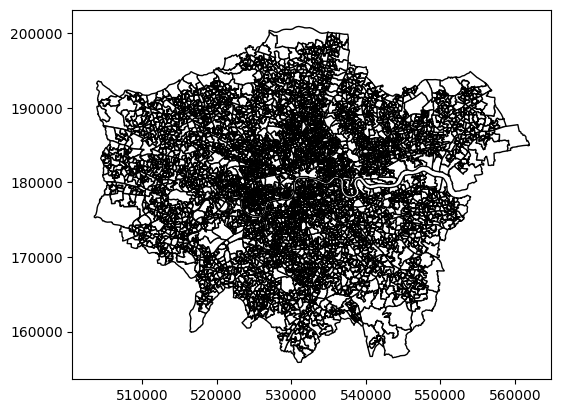

In [92]:
# Plot the LSOA boundaries 
lsao_boundary.plot(color='white', edgecolor='black')

#### Merged all Aggreagate Data to their LSAO Boundary

SInce all the data we are working on are daa from the last two year or closer, we will be 

In [ ]:
# airbnb data
# short let data
# property data
# 

## Exploratory Data Analysis (EDA)


Descriptive statistics and initial visualizations of key variables.

Explore the data
Answers the following Questions from the the Airbnb Data

* Spatial Distribution
* Property Type Insights
* Room Type Comparisons
* Capacity and Pricing Analysis:*
* Amenities and Pricing
* Bathroom and Bedroom Analysis
* Review Scores Examination
* Trend Analysis
* Outlier Detection


### Airbnb Data

**Spatial Distribution:**
- How does the spatial distribution of listings with high review scores compare to those with lower scores?
- Are there specific areas where higher-priced properties tend to cluster?
- How does the average price of listings vary by neighborhood or neighborhood group?
- Are there significant differences in average review scores between different neighborhoods or neighborhood groups?

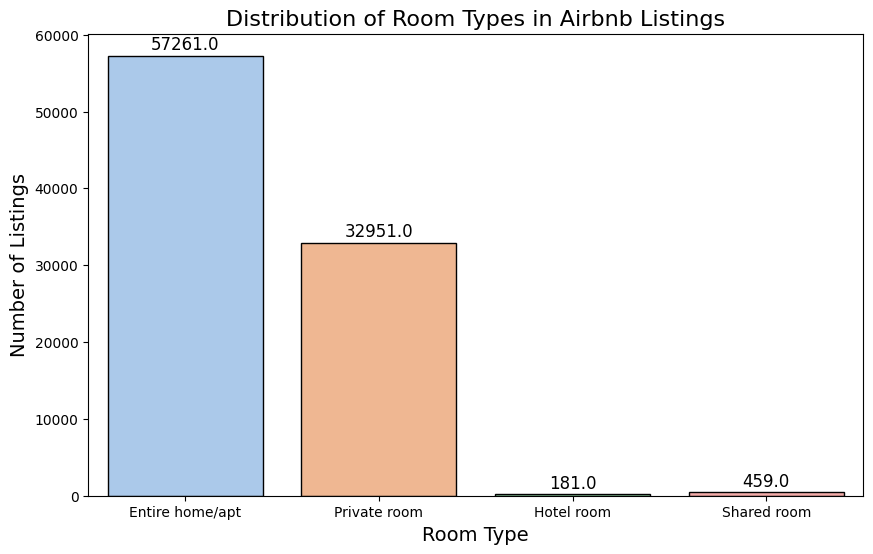

In [38]:
# Set up the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a count plot for room types
ax = sns.countplot(data=airbnb_listing_df, x='room_type', palette='pastel', edgecolor='black')

# Add labels and a title
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.title('Distribution of Room Types in Airbnb Listings', fontsize=16)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)

# Display the plot
plt.show()


In [40]:
# Calculate the percentage distribution of each room type
room_type_distribution = airbnb_listing_df['room_type'].value_counts(normalize=True) * 100

# Print the percentage distribution
print(room_type_distribution)

room_type
Entire home/apt    63.026681
Private room       36.268877
Shared room         0.505217
Hotel room          0.199225
Name: proportion, dtype: float64


The Airbnb data shows that the majority of listings are for "Entire home/apt" 63% (57,261), followed by "Private room" 36.2% (32,951). "Shared room" and "Hotel room" make up a small fraction of the listings, with 0.5% (459)  and 0.2% (181) entries, respectively.

In [11]:
# selected_columns = ['neighbourhood', 'neighbourhood_cleansed', 'latitude',
#        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
#        'bedrooms', 'beds', 'amenities', 'price','review_scores_rating',
#        'review_scores_location']

airbnb_listing_df['neighbourhood'].value_counts()

neighbourhood
0                                                       43330
Greater London, England, United Kingdom                 34414
London, United Kingdom                                   5086
London, England, United Kingdom                          4567
London, Greater London, United Kingdom                    624
                                                        ...  
Oval, London, United Kingdom                                1
Beckenham, Greater London, United Kingdom                   1
 St Margaret's, Isleworth, Middlesex, United Kingdom        1
London, Kennington, United Kingdom                          1
Earlsfield, England, United Kingdom                         1
Name: count, Length: 866, dtype: int64

CHeck the destribution of the property types in the area

<Axes: xlabel='property_type'>

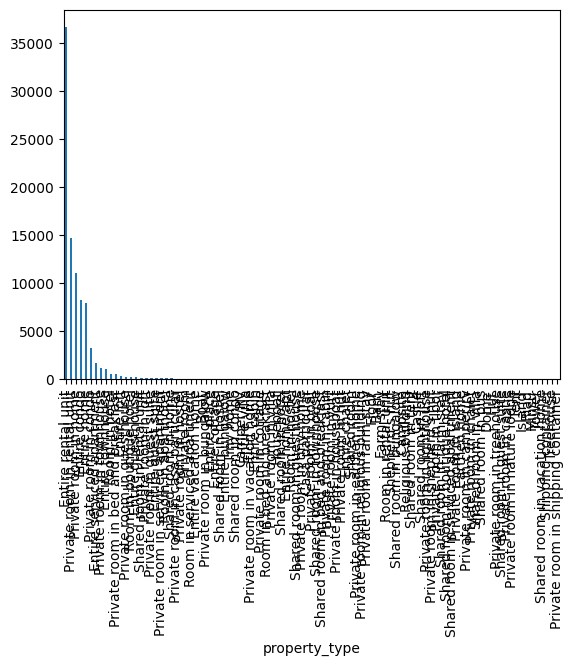

In [16]:
airbnb_list['property_type'].value_counts().plot(kind="bar")

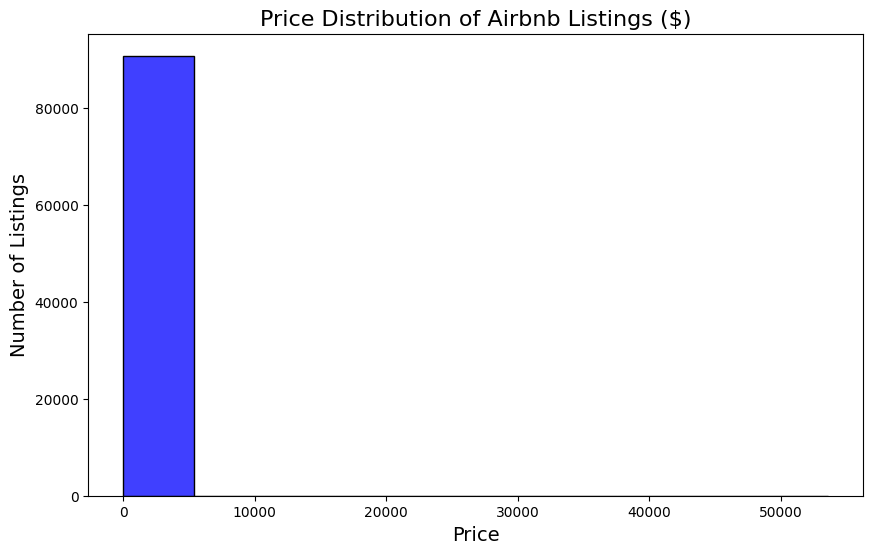

In [45]:
## check the price distubiton usning histogram
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a histogram for the price distribution
sns.histplot(airbnb_listing_df['price'], bins=10, color='blue')

# Add labels and a title
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.title('Price Distribution of Airbnb Listings ($)', fontsize=16)

# Show the plot
plt.show()

In [46]:
airbnb_listing_df['price'].value_counts()

price
0.0       32968
150.0      1155
100.0      1102
120.0      1024
60.0        998
          ...  
692.0         1
6400.0        1
960.0         1
588.0         1
1771.0        1
Name: count, Length: 1125, dtype: int64

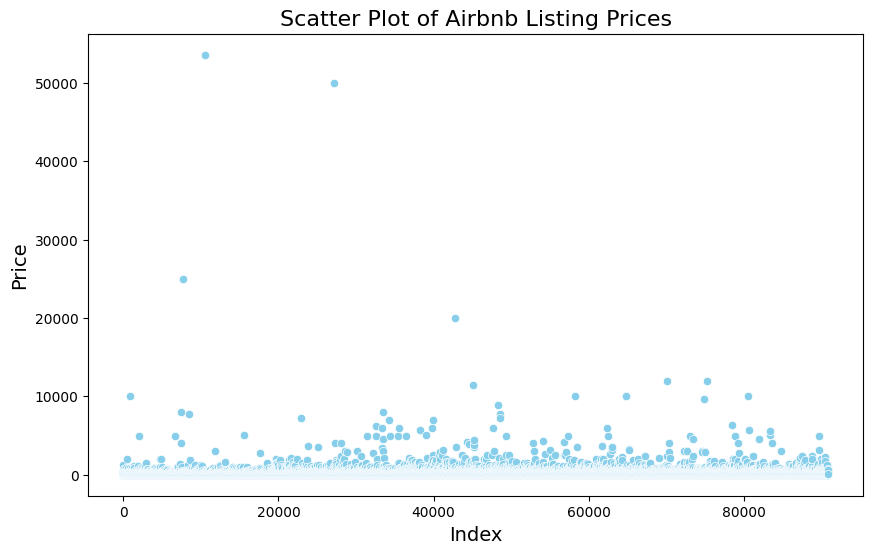

In [47]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot for the price
sns.scatterplot(data=airbnb_listing_df, x=airbnb_listing_df.index, y='price', color='skyblue')

# Add labels and a title
plt.xlabel('Number of Listings', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Plot of Airbnb Listing Prices ($)', fontsize=16)

# Show the plot
plt.show()

Capacity and Pricing Analysis
   - How does the price of listings correlate with the number of accommodations (e.g., accommodates 2 vs. 6)?
   - What is the relationship between the number of bedrooms or beds and the price of listings?

              price  bedrooms      beds  bathrooms
price      1.000000  0.191399  0.288861   0.306312
bedrooms   0.191399  1.000000  0.505918   0.414537
beds       0.288861  0.505918  1.000000   0.703664
bathrooms  0.306312  0.414537  0.703664   1.000000


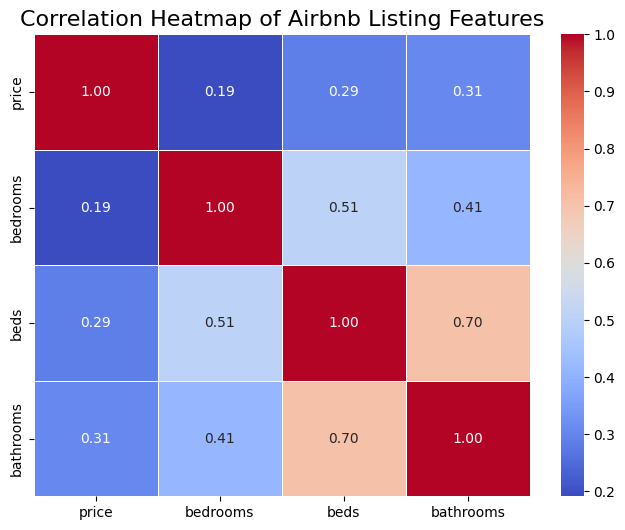

In [28]:
# Select relevant columns for correlation analysis
selected_features = airbnb_listing_df[['price', 'bedrooms', 'beds', 'bathrooms']]

# Calculate the correlation matrix
correlation_matrix = selected_features.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations, a color map, and a title
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='white')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Airbnb Listing Features', fontsize=16)

# Display the heatmap
plt.show()

Amenities and Pricing
   - Which amenities are most commonly found in higher-priced listings?
   - How does the number of amenities offered impact the review scores or pricing?
   - Bathroom and Bedroom Analysis

Using the average (mean) can sometimes be misleading, especially if your data is skewed or contains outliers. In such cases, other statistical measures and visualizations can provide a more accurate and comprehensive understanding of the data distribution.

Median is the middle value of your dataset and is less affected by extreme values compared to the mean. It provides a better central tendency measure when the data is skewed.

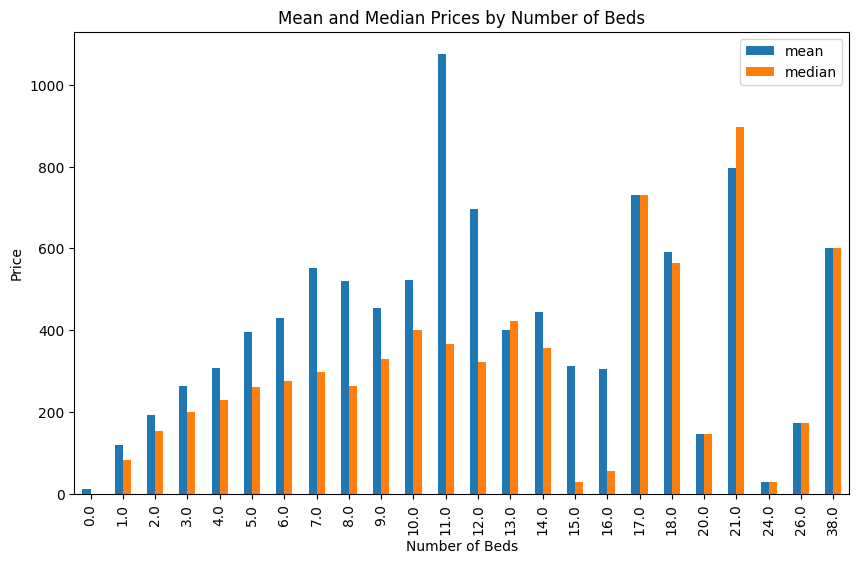

In [29]:

# Calculate mean and median prices by number of beds
mean_median_prices = selected_features.groupby('beds')['price'].agg(['mean', 'median'])

# Plot mean and median prices
mean_median_prices.plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Median Prices by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.show()

In [30]:
# Group the data by the number of beds and calculate various statistics for price
bed_stats = selected_features.groupby('beds')['price'].agg(
    mean_price=('mean'),
    median_price=('median'),
    std_dev_price=('std'),
    min_price=('min'),
    max_price=('max'),
    listing_count=('count')
)

# Sort the statistics by the number of beds for easier interpretation
bed_stats_sorted = bed_stats.sort_index()

# Print the formatted statistics
print(bed_stats_sorted)

       mean_price  median_price  std_dev_price  min_price  max_price  listing_count
beds                                                                               
0.0     11.239393           0.0      59.988792        0.0     6000.0          35874
1.0    118.301135          82.0     508.056275        0.0    53588.0          28117
2.0    193.256724         154.0     206.669671        0.0     9652.0          14128
3.0    264.573715         200.0     286.254933        0.0     8000.0           6749
4.0    308.842887         230.0     339.239389        0.0     7271.0           3367
5.0    395.092564         260.5     817.150140        0.0    25000.0           1318
6.0    430.705970         276.5     532.992170        0.0     6000.0            670
7.0    552.748201         299.0    1069.960602       30.0    12000.0            278
8.0    519.657343         264.0    1095.004921       28.0    11500.0            143
9.0    454.258065         328.5     358.830749       30.0     1600.0        


- How does the average number of bathrooms relate to the listing price?

In [32]:
# Group the data by the number of bathrooms and calculate various statistics for price
bathroom_stats = selected_features.groupby('bathrooms')['price'].agg(
    mean_price=('mean'),
    median_price=('median'),
    std_dev_price=('std'),
    min_price=('min'),
    max_price=('max'),
    listing_count=('count')
)

# Sort the statistics by the number of bathrooms for easier interpretation
bathroom_stats_sorted = bathroom_stats.sort_index()

# Print the formatted statistics
print(bathroom_stats_sorted)

            mean_price  median_price  std_dev_price  min_price  max_price  listing_count
bathrooms                                                                               
0.0           1.739336           0.0     115.735182        0.0    20000.0          33150
0.5          77.023202          60.0      85.419699       10.0     1066.0            431
1.0         142.666002         110.0     459.844023        0.0    53588.0          37096
1.5         131.031688          96.0     144.675854        0.0     5000.0           6785
2.0         250.358088         210.0     249.977028        0.0    12000.0           8766
2.5         308.655970         256.0     291.412021        0.0     8000.0           2119
3.0         385.982456         299.0     425.556344       11.0     5000.0           1368
3.5         553.334601         406.0     599.472351       21.0     7000.0            526
4.0         714.267281         425.0    1187.245428       34.0    10000.0            217
4.5         748.04800

- How does the average number of bedrroms relate to the listing price?

In [35]:
# Group the data by the number of bedrooms and calculate various statistics for price
bedroom_stats = selected_features.groupby('bedrooms')['price'].agg(
    mean_price=('mean'),
    median_price=('median'),
    min_price=('min'),
    max_price=('max'),
    listing_count=('count')
)

# Sort the statistics by the number of bedrooms for easier interpretation
bedroom_stats_sorted = bedroom_stats.sort_index()

# Print the formatted statistics
print(bedroom_stats_sorted)

           mean_price  median_price  min_price  max_price  listing_count
bedrooms                                                                
0.0         21.562517           0.0        0.0    20000.0          15004
1.0         94.023168          70.0        0.0    53588.0          44544
2.0        148.597178         133.0        0.0     9652.0          20411
3.0        225.814142         185.0        0.0    25000.0           7043
4.0        285.391741         220.0        0.0     7771.0           2688
5.0        387.237074         264.0        0.0    12000.0            793
6.0        571.741071         336.0        0.0     6000.0            224
7.0        761.281690         352.0        0.0     5000.0             71
8.0       1065.096774         345.0        0.0    11500.0             31
9.0        104.444444           0.0        0.0      464.0              9
10.0       456.222222           0.0        0.0     2786.0              9
11.0       105.500000         105.5        0.0     

In [ ]:
# Sort the amenities by their total values in descending order
top_amenities = amenities_summary.sort_values(by='Total', ascending=False).head(10)

# Display the top 10 amenities
print(top_amenities)

In [ ]:
# Plot the top 10 amenities using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Amenity', data=top_amenities, palette='viridis')

# Add labels and title
plt.xlabel('Number of Homes')
plt.ylabel('Amenity')
plt.title('Top 10 Most Common Amenities in Homes')

# Show the plot
plt.show()

In [ ]:
from wordcloud import WordCloud

# Assuming amenities_transposed is the DataFrame from the previous step
# Create a dictionary from the DataFrame for word cloud generation
amenities_dict = dict(zip(amenities_summary['Amenity'], amenities_summary['Total']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(amenities_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Airbnb Amenities', fontsize=16)
plt.show()


Review Scores Examination
   - How do review scores (accuracy and overall rating) vary by property type or room type?
   - Is there a relationship between review scores and the number of amenities offered?


Trend Analysis
   - Are there any observable trends in pricing or review scores over time within different neighborhoods or property types?
   - How do the review scores change with seasonal variations in pricing?


Outlier Detection
   - Are there any outliers in pricing or review scores based on the number of bedrooms, bathrooms, or amenities?
   - What factors contribute to high or low review scores in specific neighborhoods?

Spatial Distribution:

- How does the spatial distribution of listings with high review scores compare to those with lower scores?
- Are there specific areas where higher-priced properties tend to cluster?
- How does the average price of listings vary by neighborhood or neighborhood group?
- Are there significant differences in average review scores between different neighborhoods or neighborhood groups?

<Axes: >

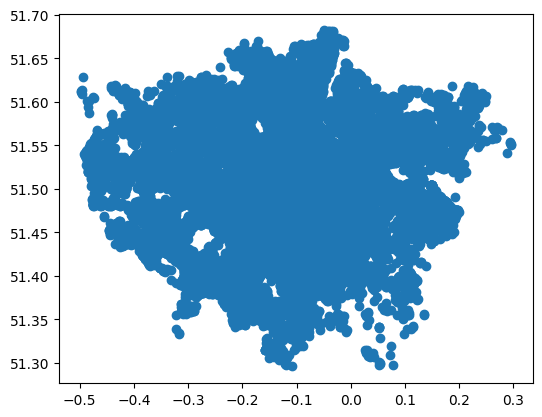

In [16]:
# Convert to GeoDataFrame
gdf_airbnb = gpd.GeoDataFrame(
    airbnb_list,
    geometry=gpd.points_from_xy(airbnb_list['longitude'], airbnb_list['latitude']),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Display the data via a plot
gdf_airbnb.plot()

Housing Prices Data

**Property Type Insights:**
   - What is the distribution of property types (e.g., entire home, private room) across different neighborhoods?
   - How does the average price differ between various property types?

Shortlet Market Data

**Room Type Comparisons:**
   - How does the average rating of listings vary between different room types (e.g., shared room, private room)?
   - Is there a correlation between room type and the number of amenities offered?

## Spatial Analysis
Geocoding and plotting data on maps. Performing hotspot analysis, spatial autocorrelation, and kernel density estimation.


1. **Map the Spatial Distribution of Airbnb Listings:**
   - Geocode Airbnb listings to visualize their distribution across different regions in the UK.
   - Use Kernel Density Estimation (KDE) to identify areas of high Airbnb concentration.

2. **Identify Clusters and Spatial Patterns:**
   - Apply Hotspot Analysis (Getis-Ord Gi*) to detect statistically significant clusters of Airbnb activity.
   - Measure spatial autocorrelation (Moran's I) to determine the degree of spatial dependency among Airbnb listings.

In [46]:
import libpysal as lib
from splot.esda import moran, plot_moran,moran_scatterplot
import esda


# Create a spatial weights matrix based on the data's spatial coordinates
w = lib.weights.distance.KNN.from_dataframe(airbnb_listing_df, k=10)

# Calculate Moran's I for the spatial coordinates
moran = esda.Moran(airbnb_listing_df['Latitude'],w)

# Print the Moran's I statistic and p-value
print(f"Moran's I: {moran.I:.2f}")
print(f"p-value: {moran.p_sim:.3f}")

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'geometry'

3. **Analyze the Impact of Proximity to Amenities:**
   - Conduct Proximity Analysis to assess how the distance to key amenities (e.g., transport hubs, tourist attractions) affects Airbnb pricing and availability.

## Regression and Impact Analysis
Running spatial regression models to assess the impact of Airbnb listings on housing prices.


4. **Examine the Relationship Between Airbnb Listings and Housing Prices:**
   - Perform a Spatial Lag Model regression to account for spatial dependencies in housing prices influenced by nearby Airbnb activity.
   - Utilize Geographically Weighted Regression (GWR) to explore how the relationship between Airbnb listings and housing prices varies spatially across the UK.

In [ ]:
# Create a spatial weights matrix based on the data's spatial coordinates
w = lib.weights.distance.KNN.from_dataframe(robbery_gdf2, k=10)

# Calculate Moran's I for the spatial coordinates
moran = esda.moran(robbery_gdf2['Latitude'],w)

# Print the Moran's I statistic and p-value
print(f"Moran's I: {moran.I:.2f}")
print(f"p-value: {moran.p_sim:.3f}")

#build a moran I sccatter plot to show spatial lag of the dataset using
fig, ax = moran_scatterplot(moran, p=0.001)
ax.set_xlabel('Latitude')
ax.set_ylabel('Spatial Lag of Latitude')
plt.show()

## Visualization
Creating choropleth maps and other visualizations to illustrate findings.


5. **Visualize Socioeconomic Factors and Airbnb Density:**
   - Create Choropleth Maps to visualize the distribution of variables such as median income, housing prices, and Airbnb density across different regions.

## Conducting impact analysis on the short-let market.

6. **Assess the Impact of Airbnb on Local Housing Markets:**
   - Conduct an Impact Analysis to examine how Airbnb density correlates with changes in housing prices and the availability of long-term rentals.
   - Use Buffer Analysis to study the effect of proximity to city centres and other key areas on Airbnb pricing and availability.


   7. **Evaluate Connectivity and Accessibility:**
   - Perform Network Analysis to assess the connectivity of Airbnb listings to transport networks and its influence on pricing and availability.

## Conclusions and Recommendations
Summarizing key findings and providing policy recommendations.


One findings from our rese thatarch is ameneiites , number a=of bedrooms and number of bathroom is not really the stronng reason that determines hosueshe prices in london evn htoughit is one of the stong vactor but with a correlation of 40 to 45% whcih indicate that the number of bathroom and bathdorom determines 40% onnhow houseign roice are listed

## Appendix
Including any additional analyses or data pre-processing steps.